## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   14 апреля 2020

**Дедлайн**:   21:00 28 апреля 2020

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованиеv библиотек `numpy`, `pandas`, `sklearn` и `matplotlib`, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [70]:
def task_1(arr):
    arr_new = arr>0
    return arr_new.all()

In [71]:
a = np.array([1,1,1,2,45])
b = np.array([-1,0, 9, 0,8,8])
print(task_1(a))
print(task_1(b))

True
False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [72]:
def task_2(arr, n):
    return np.repeat(arr, n)

In [73]:
task_2(np.array([1,2,3]), 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [74]:
def task_3(V, v):    
    if len(v) == 0:
        return []
    v_ = np.add.accumulate(v)
    V_ = np.add.accumulate(np.hstack([[0],V]))
    v__= np.hstack([np.array([0]),v_[:-1]])
    return V_[v_] - V_[v__]

In [75]:
W = np.array([0, 8, 9, -1, 3, -10])
w = np.array([2,1,3])
W_true = [8,9, -8]
task_3(W, w)

array([ 8,  9, -8])

Для следующих нескольких заданий потребуются данные. Скачайте датасет, описывающий различные автомобили, из [репозитория UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/).

Соберите из `.dat` файлов один файл `car_data.csv`, который и будет использоваться далее. Будем решать задачу многоклассовой классификации, Везде, где это требуется, используйте подход One-vs-Rest.

Запустите следующий код на полученном файле с данными.

 Я сделала `header` = 0

In [102]:
dataset = pd.read_csv('car_data.csv',delimiter=' ', header= None).values[:,:-1]
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)


__Задание 4 (1.5 балла):__ Воспользуйтесь возможностями библиотеки pandas для того, чтобы произвести базовый анализ данных. Обоснованно ответьте на следующие вопросы/решите задачи:

- сколько признаков в данных, каких они типов?
- имеются ли пропущенные значения?
- для каждого числового признака посчитайте его среднее значение и стандартное отклонение

In [104]:
pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       846 non-null    int64
 1   1       846 non-null    int64
 2   2       846 non-null    int64
 3   3       846 non-null    int64
 4   4       846 non-null    int64
 5   5       846 non-null    int64
 6   6       846 non-null    int64
 7   7       846 non-null    int64
 8   8       846 non-null    int64
 9   9       846 non-null    int64
 10  10      846 non-null    int64
 11  11      846 non-null    int64
 12  12      846 non-null    int64
 13  13      846 non-null    int64
 14  14      846 non-null    int64
 15  15      846 non-null    int64
 16  16      846 non-null    int64
 17  17      846 non-null    int64
dtypes: int64(18)
memory usage: 119.1 KB


Пропущенных значений нет, $17$ целочисленных признаков.

In [105]:
pd.DataFrame(data).std()

0       8.234474
1       6.169866
2      15.771533
3      33.472183
4       7.888251
5       4.601217
6      33.244978
7       7.811560
8       2.592138
9      14.515652
10     31.394837
11    176.692614
12     32.546490
13      7.486974
14      4.918353
15      8.931240
16      6.163949
17      7.438797
dtype: float64

In [106]:
pd.DataFrame(data).mean()

0      93.678487
1      44.861702
2      82.088652
3     168.940898
4      61.693853
5       8.567376
6     168.839243
7      40.933806
8      20.582742
9     147.998818
10    188.625296
11    439.911348
12    174.703310
13     72.462175
14      6.377069
15     12.599291
16    188.932624
17    195.632388
dtype: float64

__Задание 5 (1 балл):__ Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

- Работа с `target`:
    
    Сделаю метки класса целыми числами.

   
   
- Нормировка:

   При обучении моделей в машинном обучении, решаются задачи оптимизации для нахождения параметров модели. Если признаки будут иметь разный масштаб, то решать задачу оптимизации будет сложнее и могут возникнуть проблемы. Поэтому нормировать признаки, вычитая математическое ожидание и деля на корень из дисперссии, хорошая практика.
   
- Сбалансированность классов:

    Для корректного решения задачи классификации необходимо убедиться, что мощность классао примерно одинаковая. Иначе могут возникнуть проблемы: например, если один класс является преобладающим, то классификатор может все объекты относить к этому классу. Метрики в этом случае будут приемлемые, но решение задачи не будет информативным.
    
- Классы в трейне и тесте:

    Может возникнуть проблема с разбиением: если в трейне нет класса, который есть в тесте, очевидно, решение не будет хорошим. Аналогично с тестом.

In [107]:
pd.DataFrame(y_train).loc[:,0].value_counts()

saab    144
bus     144
opel    136
van     125
Name: 0, dtype: int64

In [108]:
pd.DataFrame(y_test).loc[:,0].value_counts()

opel    76
bus     74
van     74
saab    73
Name: 0, dtype: int64

In [109]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [110]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
encoder = OrdinalEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).T[0]
y_test = encoder.transform(y_test.reshape(-1,1)).T[0]

__Задание 6 (2.5 балла):__ Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (не переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search хватит). Постройте график ROC-кривой для данного классификатора, кривой Precision-Recall, оцените точность классификации и f1-score с разными порогами вероятности отнесения к классу. 

In [2]:
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [113]:
classifier = linear_model.LogisticRegression(random_state =  0)

In [114]:
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [115]:
parameters_grid = {
    'C' : np.linspace(1,5,100),
    'penalty' : ['l1', 'l2']
}

In [116]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
cv = sss.split(X_train, y_train)

In [117]:
clf = GridSearchCV(classifier, parameters_grid, cv=cv, verbose=0)


In [118]:
best_model = clf.fit(X_train, y_train)

In [119]:
best_model.best_estimator_

LogisticRegression(C=4.91919191919192, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
prediction = best_model.predict_proba(X_test)

In [121]:
prediction.shape

(297, 4)

In [122]:
pr_0, re_0, _ = metrics.precision_recall_curve(np.array(y_test == 0, dtype = int),prediction[:,0])
pr_1, re_1, _= metrics.precision_recall_curve(np.array(y_test == 1, dtype = int),prediction[:,1])
pr_2, re_2, _ = metrics.precision_recall_curve(np.array(y_test == 2, dtype = int),prediction[:,2])
pr_3, re_3, _= metrics.precision_recall_curve(np.array(y_test == 3, dtype = int),prediction[:,3])

In [123]:
fpr_0, tpr_0, _ = metrics.roc_curve(np.array(y_test == 0, dtype = int),prediction[:,0])
fpr_1, tpr_1, _= metrics.roc_curve(np.array(y_test == 1, dtype = int),prediction[:,1])
fpr_2, tpr_2, _ = metrics.roc_curve(np.array(y_test == 2, dtype = int),prediction[:,2])
fpr_3, tpr_3, _= metrics.roc_curve(np.array(y_test == 3, dtype = int),prediction[:,3])

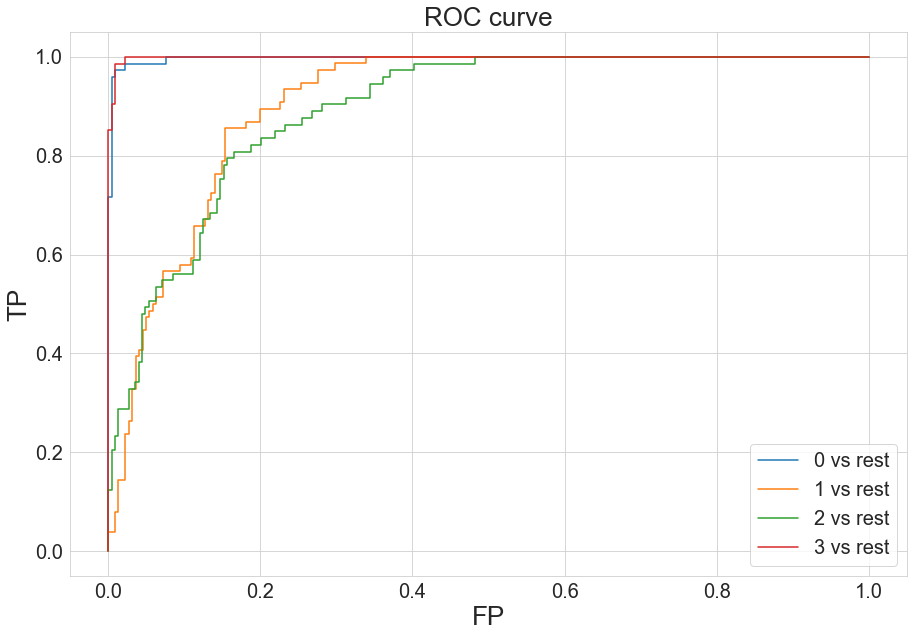

In [124]:
plt.figure(figsize=(15, 10))
plt.plot(fpr_0, tpr_0, label = '0 vs rest')
plt.plot(fpr_1, tpr_1, label = '1 vs rest')
plt.plot(fpr_2, tpr_2, label = '2 vs rest')
plt.plot(fpr_3, tpr_3, label = '3 vs rest')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title(r'ROC curve', fontsize = 26)
plt.xlabel(r"FP", fontsize=26)
plt.ylabel(r"TP", fontsize=26)
plt.grid(True)
plt.show()


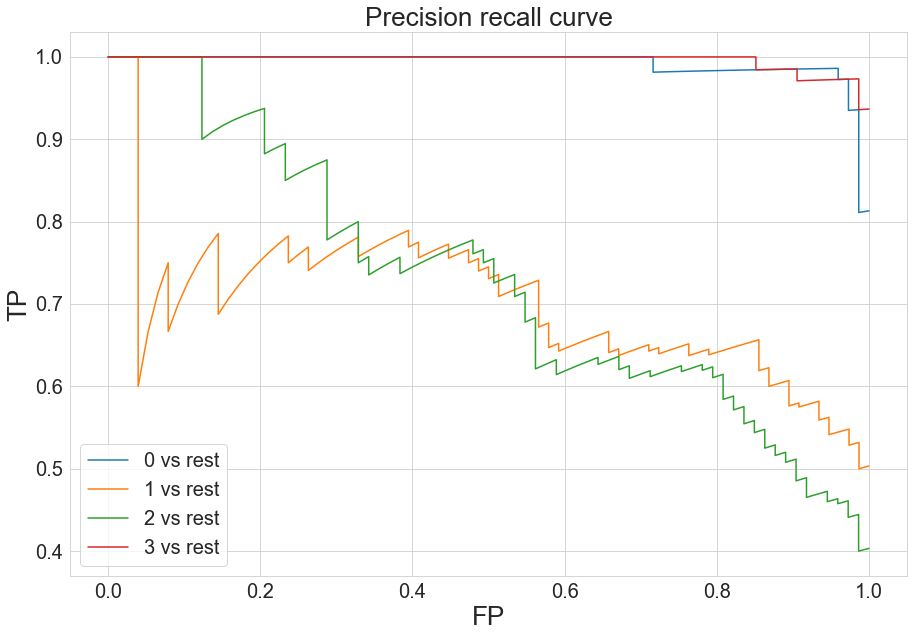

In [125]:
plt.figure(figsize=(15, 10))
plt.plot(re_0,pr_0,  label = '0 vs rest')
plt.plot(re_1,pr_1,  label = '1 vs rest')
plt.plot(re_2,pr_2,  label = '2 vs rest')
plt.plot( re_3,pr_3, label = '3 vs rest')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title(r'Precision recall curve', fontsize = 26)
plt.xlabel(r"FP", fontsize=26)
plt.ylabel(r"TP", fontsize=26)
plt.grid(True)
plt.show()

In [126]:
thresholds = np.arange(0,1.1, 0.1)

__Задание 7 (1.5 балла):__ Одним из методов понижения размерности данных является линейное преобразование PCA (метод главных компонент), идея которого заключается в том, чтобы спроецировать выборку на подпространство из тех признаков, по которым значение дисперсии наиболее велико.

- Ознакомьтесь с данным методом, затем примените реализацию из `sklearn` к обучающей выборке (train).
- Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент. 
- Визуализируйте данные в пространстве первых двух главных компонент.

In [127]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_
new_X = pca.transform(X_train)

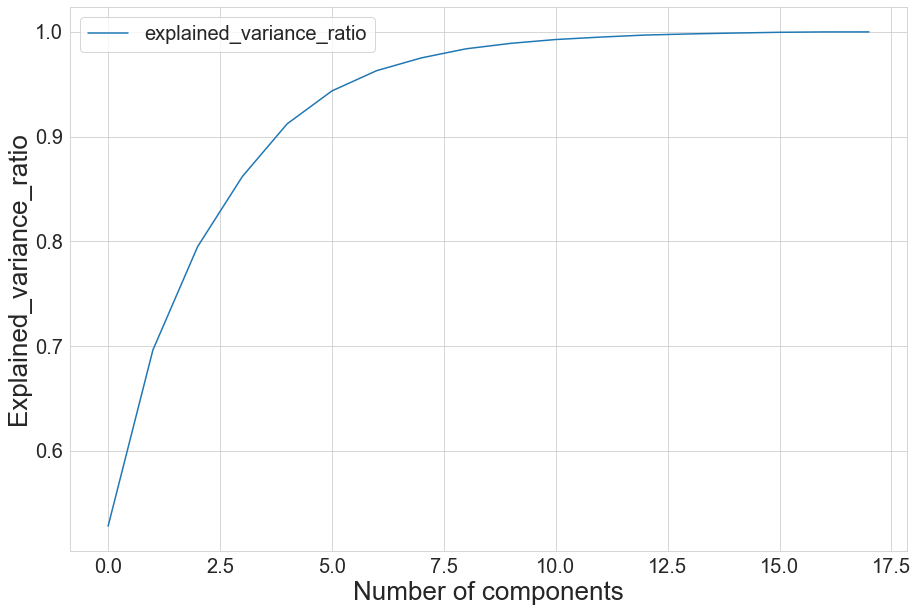

In [128]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(X_train.shape[1]), np.cumsum(pca.explained_variance_ratio_),label = 'explained_variance_ratio')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel(r"Number of components", fontsize=26)
plt.ylabel(r"Explained_variance_ratio", fontsize=26)
plt.grid(True)
plt.show()


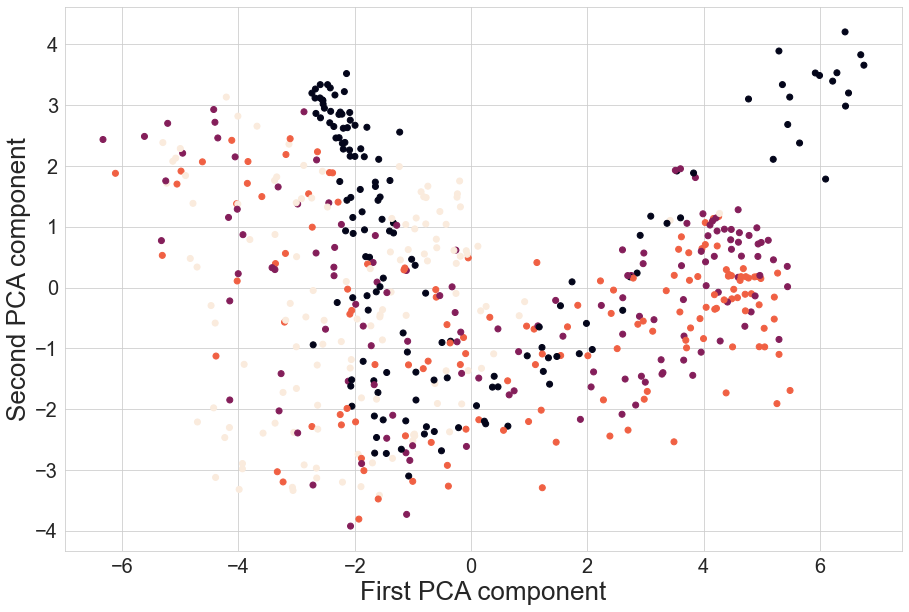

In [129]:
plt.figure(figsize=(15, 10))
plt.scatter(new_X[:,0], new_X[:,1],c = y_train)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.xlabel(r"First PCA component", fontsize=26)
plt.ylabel(r"Second PCA component", fontsize=26)
plt.grid(True)
plt.show()


__Задание 8 (0.5 балла):__ Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор. Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`)

По графику видно, что при проецирование признакого подпространства на подпространства из первых $10$ компонент сохраняется более $95$ процентов дисперсии, поэтому я осталю первые $10.$

In [130]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

__Задание 9 (1 балл):__ Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете. Постройте график ROC-кривой для полученных классификаторов, кривой Precision-Recall, оцените точность классификации и f1-score. 

In [131]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
cv = sss.split(X_train, y_train)
classifier = linear_model.LogisticRegression(random_state =  0)
clf = GridSearchCV(classifier, parameters_grid, cv=cv, verbose=0)
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

LogisticRegression(C=1.121212121212121, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
prediction = best_model.best_estimator_.predict_proba(X_test)

In [133]:
pr_0, re_0, _ = metrics.precision_recall_curve(np.array(y_test == 0, dtype = int),prediction[:,0])
pr_1, re_1, _= metrics.precision_recall_curve(np.array(y_test == 1, dtype = int),prediction[:,1])
pr_2, re_2, _ = metrics.precision_recall_curve(np.array(y_test == 2, dtype = int),prediction[:,2])
pr_3, re_3, _= metrics.precision_recall_curve(np.array(y_test == 3, dtype = int),prediction[:,3])

In [134]:
fpr_0, tpr_0, _ = metrics.roc_curve(np.array(y_test == 0, dtype = int),prediction[:,0])
fpr_1, tpr_1, _= metrics.roc_curve(np.array(y_test == 1, dtype = int),prediction[:,1])
fpr_2, tpr_2, _ = metrics.roc_curve(np.array(y_test == 2, dtype = int),prediction[:,2])
fpr_3, tpr_3, _= metrics.roc_curve(np.array(y_test == 3, dtype = int),prediction[:,3])

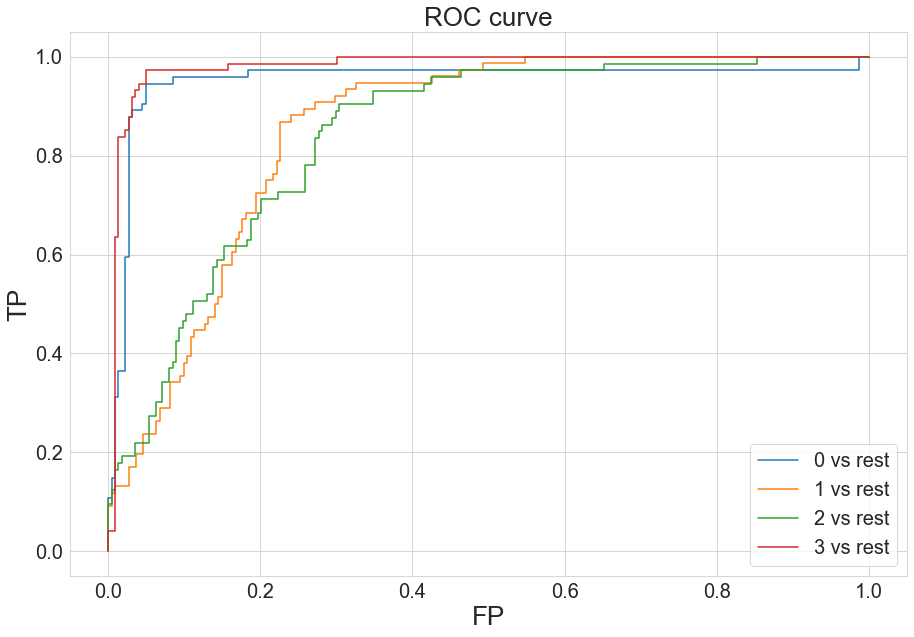

In [135]:
plt.figure(figsize=(15, 10))
plt.plot(fpr_0, tpr_0, label = '0 vs rest')
plt.plot(fpr_1, tpr_1, label = '1 vs rest')
plt.plot(fpr_2, tpr_2, label = '2 vs rest')
plt.plot(fpr_3, tpr_3, label = '3 vs rest')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title(r'ROC curve', fontsize = 26)
plt.xlabel(r"FP", fontsize=26)
plt.ylabel(r"TP", fontsize=26)
plt.grid(True)
plt.show()

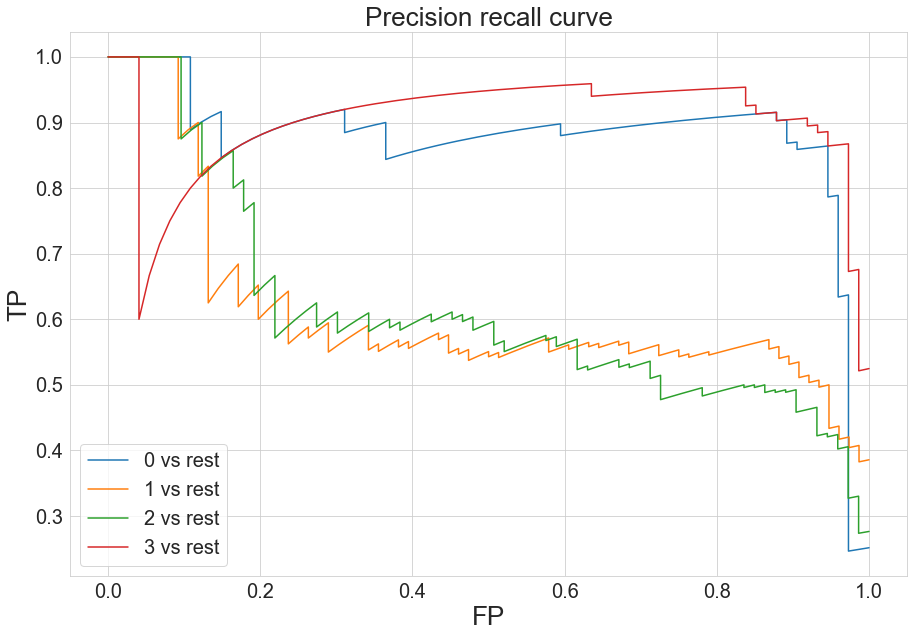

In [136]:
plt.figure(figsize=(15, 10))
plt.plot(re_0,pr_0,  label = '0 vs rest')
plt.plot(re_1,pr_1,  label = '1 vs rest')
plt.plot(re_2,pr_2,  label = '2 vs rest')
plt.plot( re_3,pr_3, label = '3 vs rest')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title(r'Precision recall curve', fontsize = 26)
plt.xlabel(r"FP", fontsize=26)
plt.ylabel(r"TP", fontsize=26)
plt.grid(True)
plt.show()

In [137]:
y_pred = best_model.best_estimator_.predict(X_test)

In [138]:
print('f1 score:{}, auc score:{}'.format(metrics.f1_score(y_test, y_pred, average = 'macro'), metrics.accuracy_score(y_test,y_pred)))

f1 score:0.7122693959911736, auc score:0.7205387205387206


Для следующих заданий потребуется синтетическая выборка.

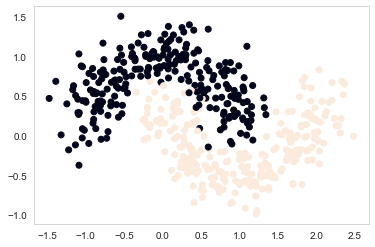

In [169]:
%matplotlib inline

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

__Задание 10 (1 балл):__ Попробуйте обучить на этих данных линейный SVM (используйте класс `svm.SVC`), померяйте качество в терминах метрик, рассмотренных выше. Изобразите разделяющую прямую (смотрите примеры в документации `sklearn`). Какие есть проблемы?

In [170]:
X_train, X_test, y_train,y_test = train_test_split(moons_points, moons_labels )

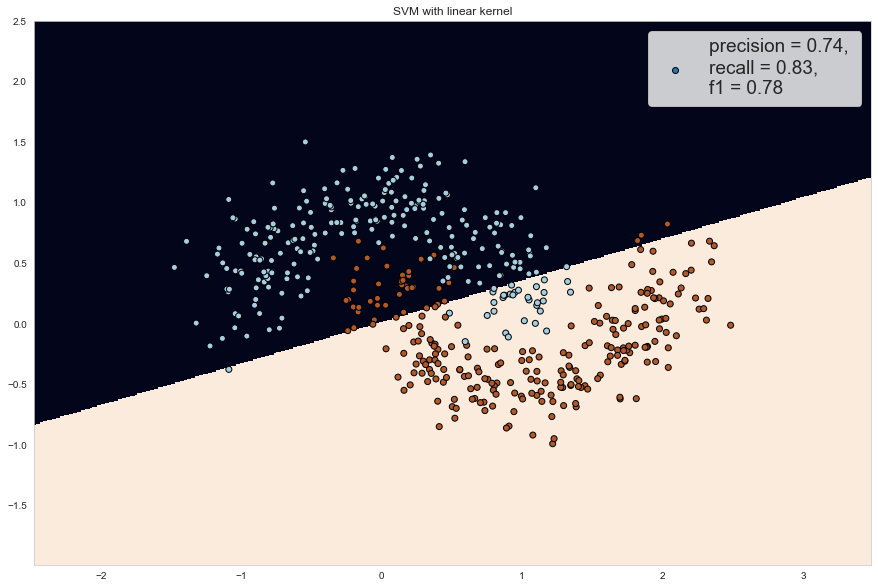

In [171]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
h = 0.01

y_pred = clf.predict(X_test)
score  = metrics.precision_recall_fscore_support(y_pred, y_test, average='binary')
plt.figure(figsize=(15, 10))
x_min, x_max = moons_points[:, 0].min() - 1, moons_points[:, 0].max() + 1
y_min, y_max = moons_points[:, 1].min() - 1, moons_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z)

plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, cmap=plt.cm.Paired, edgecolors='k', 
            label = 'precision = {:0.2f}, \nrecall = {:0.2f}, \nf1 = {:0.2f}'.format(score[0], score[1], score[2]))
plt.title('SVM with linear kernel')

plt.legend(fontsize = 19)
plt.axis('tight')
plt.show()

In [172]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Проблема очевидна:выборка не является линейно разделимой.

__Задание 11 (2.5 балл):__ Применим ядровой переход. Попробуйте перебрать различные ядра (полиномиальное, rbf, сигмоидальное) и важные для них гиперпараметры, оптимизируя f1-меру на обучающих данных. Нарисуйте соответствующие графики зависимости качества от значений разных параметров. Для наилучшего набора измерьте/изобразите все описанные в предыдущих заданиях метрики (на тестовой выборке). Изобразите итоговую разделяющую поверхность для лучшего решения на всей выборке.

Ответьте на следующие вопросы:
- как изменилось качество классификации на тесте?
- какая степень полиномиального ядра оказалась лучшей? Почему?

In [173]:
tuned_parameters = {'kernel': ['rbf','sigmoid','poly'], 
                     'C': np.arange(0.1,4,0.1) ,'degree': np.arange(1,10)}
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
cv = sss.split(X_train, y_train)

classif = SVC()
grid = GridSearchCV(classif, tuned_parameters, scoring = 'f1', cv = cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=<generator object BaseShuffleSplit.split at 0x1289dc228>,
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9]),
                         'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [174]:
test_scores = grid.cv_results_['mean_test_score']
params = pd.DataFrame(grid.cv_results_['params'])
params['scores'] = test_scores

In [175]:
params[params['kernel'] == 'poly'].max()

C              3.9
degree           9
kernel        poly
scores    0.904481
dtype: object

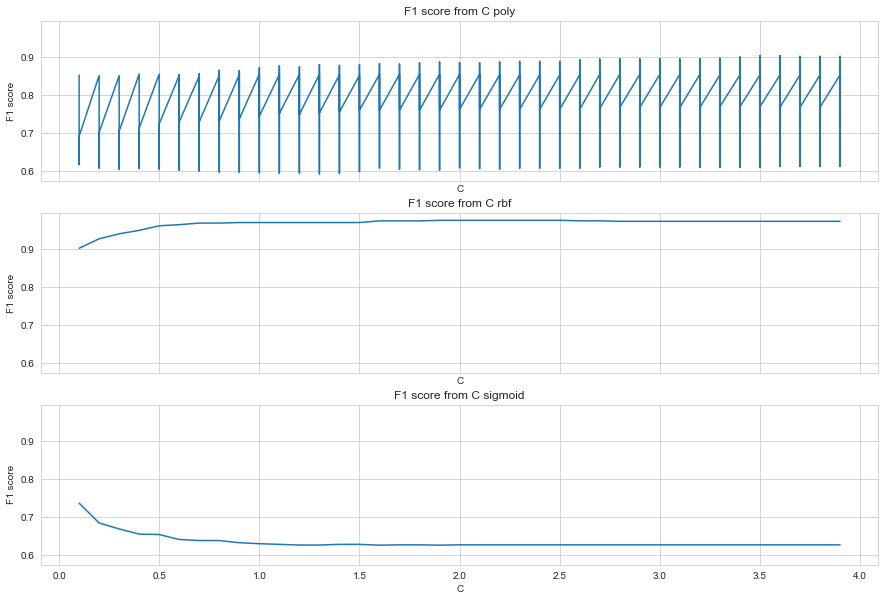

In [176]:
fig, ax = plt.subplots(3, sharex=True, sharey=True,figsize=(15, 10))
for axs in ax.flat:
    axs.set(xlabel='C', ylabel='F1 score')
ax[0].plot(params[params['kernel'] == 'poly']['C'], params[params['kernel'] == 'poly']['scores'])
ax[0].grid(True)
ax[0].set_title('F1 score from C poly')
ax[1].plot(params[params['kernel'] == 'rbf']['C'], params[params['kernel'] == 'rbf']['scores'])
ax[1].set_title('F1 score from C rbf')
ax[1].grid(True)
ax[2].plot(params[params['kernel'] == 'sigmoid']['C'], params[params['kernel'] == 'sigmoid']['scores'])
ax[2].set_title('F1 score from C sigmoid')

ax[2].grid(True)


**Изобразим лучший результат и посчитаем метрики:**

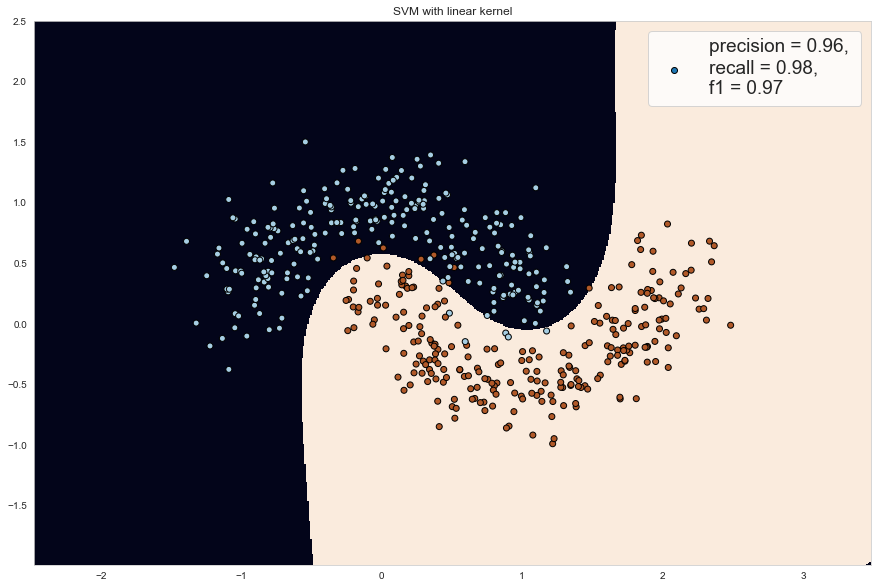

In [177]:
y_pred = grid.best_estimator_.predict(X_test)
score  = metrics.precision_recall_fscore_support(y_pred, y_test, average='binary')
score  = metrics.precision_recall_fscore_support(y_pred, y_test, average='binary')
plt.figure(figsize=(15, 10))
x_min, x_max = moons_points[:, 0].min() - 1, moons_points[:, 0].max() + 1
y_min, y_max = moons_points[:, 1].min() - 1, moons_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = grid.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z)

plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels, cmap=plt.cm.Paired, edgecolors='k', 
            label = 'precision = {:0.2f}, \nrecall = {:0.2f}, \nf1 = {:0.2f}'.format(score[0], score[1], score[2]))
plt.title('SVM with linear kernel')

plt.legend(fontsize = 19)
plt.axis('tight')
plt.show()

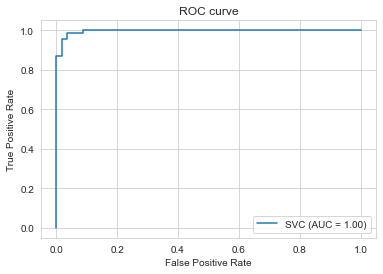

In [178]:

metrics.plot_roc_curve(grid.best_estimator_, X_test, y_test)
plt.title('ROC curve')
plt.grid(True)
plt.show()

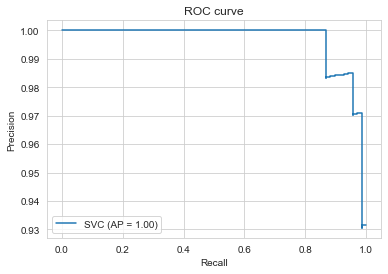

In [179]:
metrics.plot_precision_recall_curve(grid.best_estimator_, X_test, y_test)
plt.title('ROC curve')
plt.grid(True)
plt.show()

__Задание 12 (1.5 балл):__ Такого рода задачу можно решить и с помощью линейного классификатора, например, лог-регресии. Здесь может помочь генерация нового признакового пространства путём использования полиномиальных признаков (посмотрите класс `PolynomialFeatures` в `sklearn`). Сгенерируйте новые признаки (попробуйте разные степени), обучите на них лог-регрессию и померяйте качество в терминах описанных выше метрик. Какая степень оказалась наилучшей с точки зрения качества на тесте? Сравните с результатами ядрового SVM с полиномиальным ядром с той же степенью.

In [180]:
from sklearn.preprocessing import PolynomialFeatures

In [181]:
degrees = np.arange(1,15)

In [182]:
res = dict()
for i in degrees:
    polyfeatures = PolynomialFeatures(degree = i)
    polyfeatures.fit(X_train)
    X = polyfeatures.transform(X_train)
    test = polyfeatures.transform(X_test)
    clf = linear_model.LogisticRegression()
    clf.fit(X ,y_train)
    prediction = clf.predict(test)
    score = metrics.precision_recall_fscore_support(y_test, prediction, average = 'binary')
    res[i] = {'precision':score[0], 'recall':score[1], 'f1':score[2]}

In [183]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
precision,0.828125,0.822581,0.953846,0.969231,0.970149,0.984848,0.970149,0.970149,0.970149,0.970149,0.970149,0.970149,0.970149,0.969231
recall,0.779412,0.750000,0.911765,0.926471,0.955882,0.955882,0.955882,0.955882,0.955882,0.955882,0.955882,0.955882,0.955882,0.926471
f1,0.803030,0.784615,0.932331,0.947368,0.962963,0.970149,0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,0.962963,0.947368


Лучшее качество на тесте достигается при генерации признаков со степенями от $6$ по $13.$

Посмотрим на SVC с полимониальным ядром $6$ степени:

In [184]:
params[params['kernel'] == 'poly'][params['degree'] == 6].max()

C              3.9
degree           6
kernel        poly
scores    0.624269
dtype: object

В этой секции мы поработаем с датасетом Human Activity Recognition (HAR). Данные доступны в [репозитории UCI](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones). Скачайте их и поместите директорию `data` в одной директории с этим ноутбуком. Доступны сырая и предобработанная версии данных, в этой части задания мы будем работать с предобработанными.

Выберите одну из библиотек для градиентного бустинга, которой вы воспользуетесь в дальнейшем (если есть желание, можете попробовать все, это полезно):

- LightGBM by Microsoft. [Link to github](https://github.com/Microsoft/LightGBM).
- xgboost by dlmc. [Link to github](https://github.com/dmlc/xgboost).
- Catboost by Yandex. [Link to github](https://github.com/catboost/catboost).

Реализацию Random Forest возьмите из `sklearn`.

__Задание 13 (5 баллов):__ Предобработайте данные, используя информацию с лекций/семинаров, после чего примените к предобработанному датасету случайный лес и градиентный бустинг. Основной задачей является достижение не менее 85% точности классификации на тестовых данных. Детали:

- изучите смысл и состав признаков, нет ли признаков, являющихся лишними или вредными? Ответ поясните
- вспомните про метод главных компонент, не мог бы он помочь в этой задаче?
- для получения нужного качества модели нужно аккуратно настраивать. Процесс настройки (с перебором гиперпараметров по сетке) отобразите в виде графиков зависимости качества от гиперпараметров

При выставлении баллов за это задание будет оцениваться как качество решения, так и полнота/корректность опробованных идей и методов.

In [4]:
X_train = np.genfromtxt('data/train/X_train.txt')
y_train = np.genfromtxt('data/train/y_train.txt')

X_test = np.genfromtxt('data/test/X_test.txt')
y_test = np.genfromtxt('data/test/y_test.txt')

with open('data/activity_labels.txt', 'r') as iofile:
    activity_labels = iofile.readlines()

activity_labels = [x.replace('\n', '').split(' ') for x in activity_labels]
activity_labels = dict([(int(x[0]), x[1]) for x in activity_labels])

Обработка:
- Поиск пропущенных значений
- Анализ сбалансированности классов
- Нормировка
- ОТбор признаков с помощью PCA

Обучение:

Проведу подбор параметров по сетке

Тестирование:

Посмотрю на метрики качества для полученной модели.



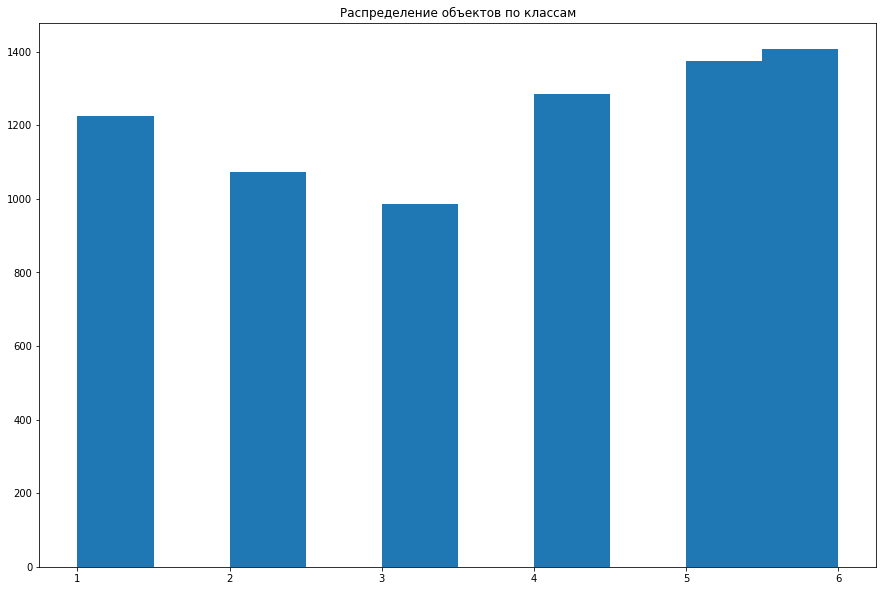

In [5]:
plt.figure(figsize=(15,10))
plt.title('Распределение объектов по классам')
plt.hist(y_train)
plt.show()

Классы являются сбалансированными, все хорошо.

Теперь посмотрим на признаки:

In [6]:
data = pd.DataFrame(X_train)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [8]:
nulls = data.isnull() == False
if nulls.all().sum() == data.shape[1]:
    print('Пропущенных значений нет')
else:
    print('Пропуски есть!')

Пропущенных значений нет


Пропусков в данных нет, но на самом деле деревья могут обрабатывать и данные с пропусками, поэтому если бы в данных было бы какое-то количество пропусков, то ничего страшного бы не произошло, но стоило проверить их долю в данных.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
pca = PCA()
pca.fit(X_train_scaled)
pca.explained_variance_ratio_
new_X = pca.transform(X_train_scaled)

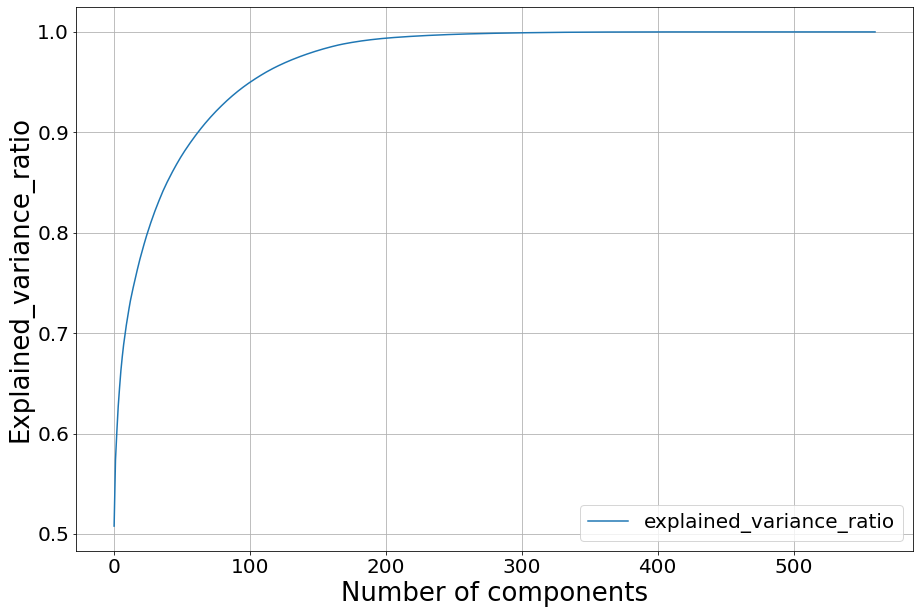

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(X_train.shape[1]), np.cumsum(pca.explained_variance_ratio_),label = 'explained_variance_ratio')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel(r"Number of components", fontsize=26)
plt.ylabel(r"Explained_variance_ratio", fontsize=26)
plt.grid(True)
plt.show()



По графику видно, что первых двухсот компонент достаточно, поэтому оставим только их.

In [12]:
pca = PCA(n_components=200)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

Подбор параметров модели:

In [13]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [15]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
cv = sss.split(X_train, y_train)
forest = RandomForestClassifier(n_estimators=1000, min_samples_split=7, max_depth=10)

forest.fit(X_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = forest.predict(X_pca_test)

In [19]:
print('f1 score:',metrics.f1_score(y_test,y_pred,average='macro'))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

f1 score: 0.863619822792208
accuracy: 0.8686800135731252


In [20]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
cv = sss.split(X_pca, y_train)

model = CatBoostClassifier()
params={'n_estimators':[200, 500, 800, 1000], 'max_depth':[5,10,15]}


In [21]:
grid = RandomizedSearchCV(model, params, cv = cv)

In [ ]:
grid.fit(X_pca, y_train)

Learning rate set to 0.104581


Мой компьютер считал это миллион лет (1 день, потому что у меня нет своей GPU), а на colab у меня уже достигнуто ограничение. Я выше привела пример того, как буду рассчитывать параметры по сетке. А сейчас ниже я просто запущу catboost с какими-то параметрами и посчитаю метрики качетва.

In [28]:
model = CatBoostClassifier(n_estimators=100,max_depth = 10)

In [29]:
model.fit(X_pca, y_train)

Learning rate set to 0.5
0:	learn: 1.0422108	total: 918ms	remaining: 1m 30s
1:	learn: 0.7774034	total: 1.8s	remaining: 1m 28s
2:	learn: 0.6374721	total: 2.67s	remaining: 1m 26s
3:	learn: 0.5249519	total: 3.58s	remaining: 1m 25s
4:	learn: 0.4524193	total: 4.53s	remaining: 1m 26s
5:	learn: 0.3982005	total: 5.45s	remaining: 1m 25s
6:	learn: 0.3573345	total: 6.35s	remaining: 1m 24s
7:	learn: 0.3225368	total: 7.27s	remaining: 1m 23s
8:	learn: 0.2895968	total: 8.27s	remaining: 1m 23s
9:	learn: 0.2657620	total: 9.28s	remaining: 1m 23s
10:	learn: 0.2434396	total: 10.4s	remaining: 1m 23s
11:	learn: 0.2269345	total: 11.4s	remaining: 1m 23s
12:	learn: 0.2114828	total: 12.4s	remaining: 1m 22s
13:	learn: 0.1933174	total: 13.4s	remaining: 1m 22s
14:	learn: 0.1794488	total: 14.3s	remaining: 1m 21s
15:	learn: 0.1650045	total: 15.3s	remaining: 1m 20s
16:	learn: 0.1533849	total: 16.3s	remaining: 1m 19s
17:	learn: 0.1429672	total: 17.3s	remaining: 1m 18s
18:	learn: 0.1320096	total: 18.3s	remaining: 1m 18

In [30]:
y_pred = model.predict(X_pca_test)
print('f1 score:',metrics.f1_score(y_test,y_pred,average='macro'))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

f1 score: 0.9058041543380452
accuracy: 0.9083814048184594


В процессе выполнения домашнего задания у меня возник вопрос, я не смогла найти на него ответ: 

когда используется случайный лес - цель обучить как можно более глубокие деревья , так как нам хочется,чтобы ошибки полученных деревьев были максимально нескоррелированы. Скажите, пожалуйста, что можно сказать про бустинг? Правда ли, что строить глубокие деревья не имеет смысла, так как в таком случае ошибки на обучающей выборке будут маленькие (в силу того, что каждое добавленное в ансамбль дерево будет переобучено и , как следствие, будет иметь иметь маленькие ошибки). То есть деревья должны быть не глубокие иначе сама суть алгоритма теряется?

И еще вопрос: правда ли, что делать бустинг на линейных моделях бессмыслено? (Все равно получится что-то линейное, нет нелинейности). Если у Вас будет возможность ответить, буду благодарна.